In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pandas as pd 
from classes.tracks import Track

df_raw = pd.read_csv('datasets/Tracks1973-2022_850.csv')
df_raw = df_raw.dropna(axis=0)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44092 entries, 0 to 87297
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        44092 non-null  int64  
 1   Name              44092 non-null  object 
 2   Id                44092 non-null  object 
 3   Year              44092 non-null  float64
 4   danceability      44092 non-null  float64
 5   energy            44092 non-null  float64
 6   key               44092 non-null  float64
 7   loudness          44092 non-null  float64
 8   mode              44092 non-null  float64
 9   speechiness       44092 non-null  float64
 10  acousticness      44092 non-null  float64
 11  instrumentalness  44092 non-null  float64
 12  liveness          44092 non-null  float64
 13  valence           44092 non-null  float64
 14  tempo             44092 non-null  float64
 15  duration_ms       44092 non-null  float64
dtypes: float64(13), int64(1), object(2)
memo

In [2]:
df = df_raw.drop(['Unnamed: 0', 'Name', 'Id'], axis=1)
df.head(10)

Year  danceability  energy   key  loudness  mode  speechiness  \
0  1973.0         0.307   0.433   1.0   -10.057   1.0       0.0290   
1  1973.0         0.657   0.435  10.0   -15.707   1.0       0.0552   
2  1973.0         0.249   0.834   0.0    -8.210   1.0       0.0577   
3  1973.0         0.331   0.550   0.0    -6.483   1.0       0.0272   
4  1973.0         0.422   0.752   6.0    -8.682   1.0       0.0449   
5  1973.0         0.665   0.673   0.0    -7.950   1.0       0.0493   
6  1973.0         0.406   0.713   7.0    -5.490   1.0       0.0348   
7  1973.0         0.731   0.804  11.0    -7.621   0.0       0.0473   
8  1973.0         0.601   0.574   2.0    -8.166   1.0       0.0300   
9  1973.0         0.523   0.626   0.0    -9.425   1.0       0.0523   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
0        0.3880          0.000091    0.3320    0.224  160.900     266960.0  
1        0.7390          0.000000    0.1670    0.771  135.975     181133.0  
2        0.0738          0.000095    0.0924    0.338  118.223     547107.0  
3        0.6050          0.000004    0.1920    0.429  177.734     339000.0  
4        0.0366          0.000119    0.1290    0.403  120.471     356627.0  
5        0.2590          0.000008    0.4970    0.779  132.642     322549.0  
6        0.2760          0.003540    0.1120    0.577  164.444     365093.0  
7        0.1720          0.000280    0.0685    0.957  107.383     205933.0  
8        0.5790          0.000011    0.2160    0.800  147.964     214080.0  
9        0.1550          0.000000    0.0869    0.917  134.127     214867.0

In [3]:
npy = df.to_numpy()
scaller = MinMaxScaler()
X = scaller.fit_transform(npy)

In [4]:
from sklearn import cluster, preprocessing, metrics
model = cluster.KMeans(n_clusters=100)
clusters = model.fit_predict(X)
clusters.shape

(44092,)

In [71]:
from collections import Counter

print(Counter(clusters))
np.unique(clusters)

Counter({42: 905, 22: 765, 12: 758, 87: 738, 61: 730, 98: 708, 26: 688, 44: 685, 97: 680, 35: 664, 3: 661, 40: 661, 70: 648, 34: 638, 1: 636, 38: 620, 69: 605, 24: 603, 45: 591, 7: 572, 96: 571, 74: 566, 19: 566, 78: 565, 50: 562, 64: 560, 37: 546, 84: 533, 30: 531, 25: 528, 82: 525, 92: 512, 16: 510, 13: 507, 79: 505, 58: 502, 56: 502, 20: 478, 77: 476, 59: 473, 21: 469, 43: 466, 29: 465, 54: 462, 90: 459, 66: 457, 28: 456, 46: 436, 4: 435, 80: 434, 51: 432, 2: 423, 18: 414, 49: 413, 10: 412, 8: 405, 55: 405, 52: 403, 94: 397, 47: 392, 5: 390, 75: 379, 6: 378, 57: 373, 23: 367, 11: 362, 62: 361, 31: 351, 68: 346, 63: 335, 65: 320, 0: 311, 85: 306, 53: 306, 95: 305, 48: 304, 36: 297, 32: 295, 83: 288, 76: 281, 89: 279, 60: 273, 14: 271, 17: 270, 99: 255, 67: 248, 71: 245, 73: 232, 88: 227, 39: 219, 9: 218, 33: 204, 91: 188, 81: 173, 15: 170, 72: 160, 27: 142, 86: 104, 41: 54, 93: 52})


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
df.shape

(44092, 13)

In [6]:
cc = df.iloc[0].to_numpy().reshape((1, 12))
cc = scaller.transform(cc)
model.predict(cc)


ValueError: cannot reshape array of size 13 into shape (1,12)

<AxesSubplot:xlabel='instrumentalness', ylabel='acousticness'>

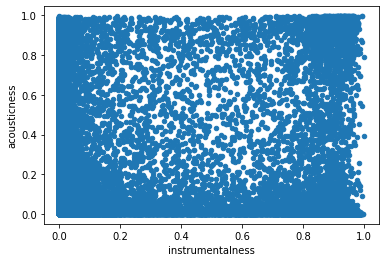

In [ ]:
df.plot.scatter(x='instrumentalness', y='acousticness')

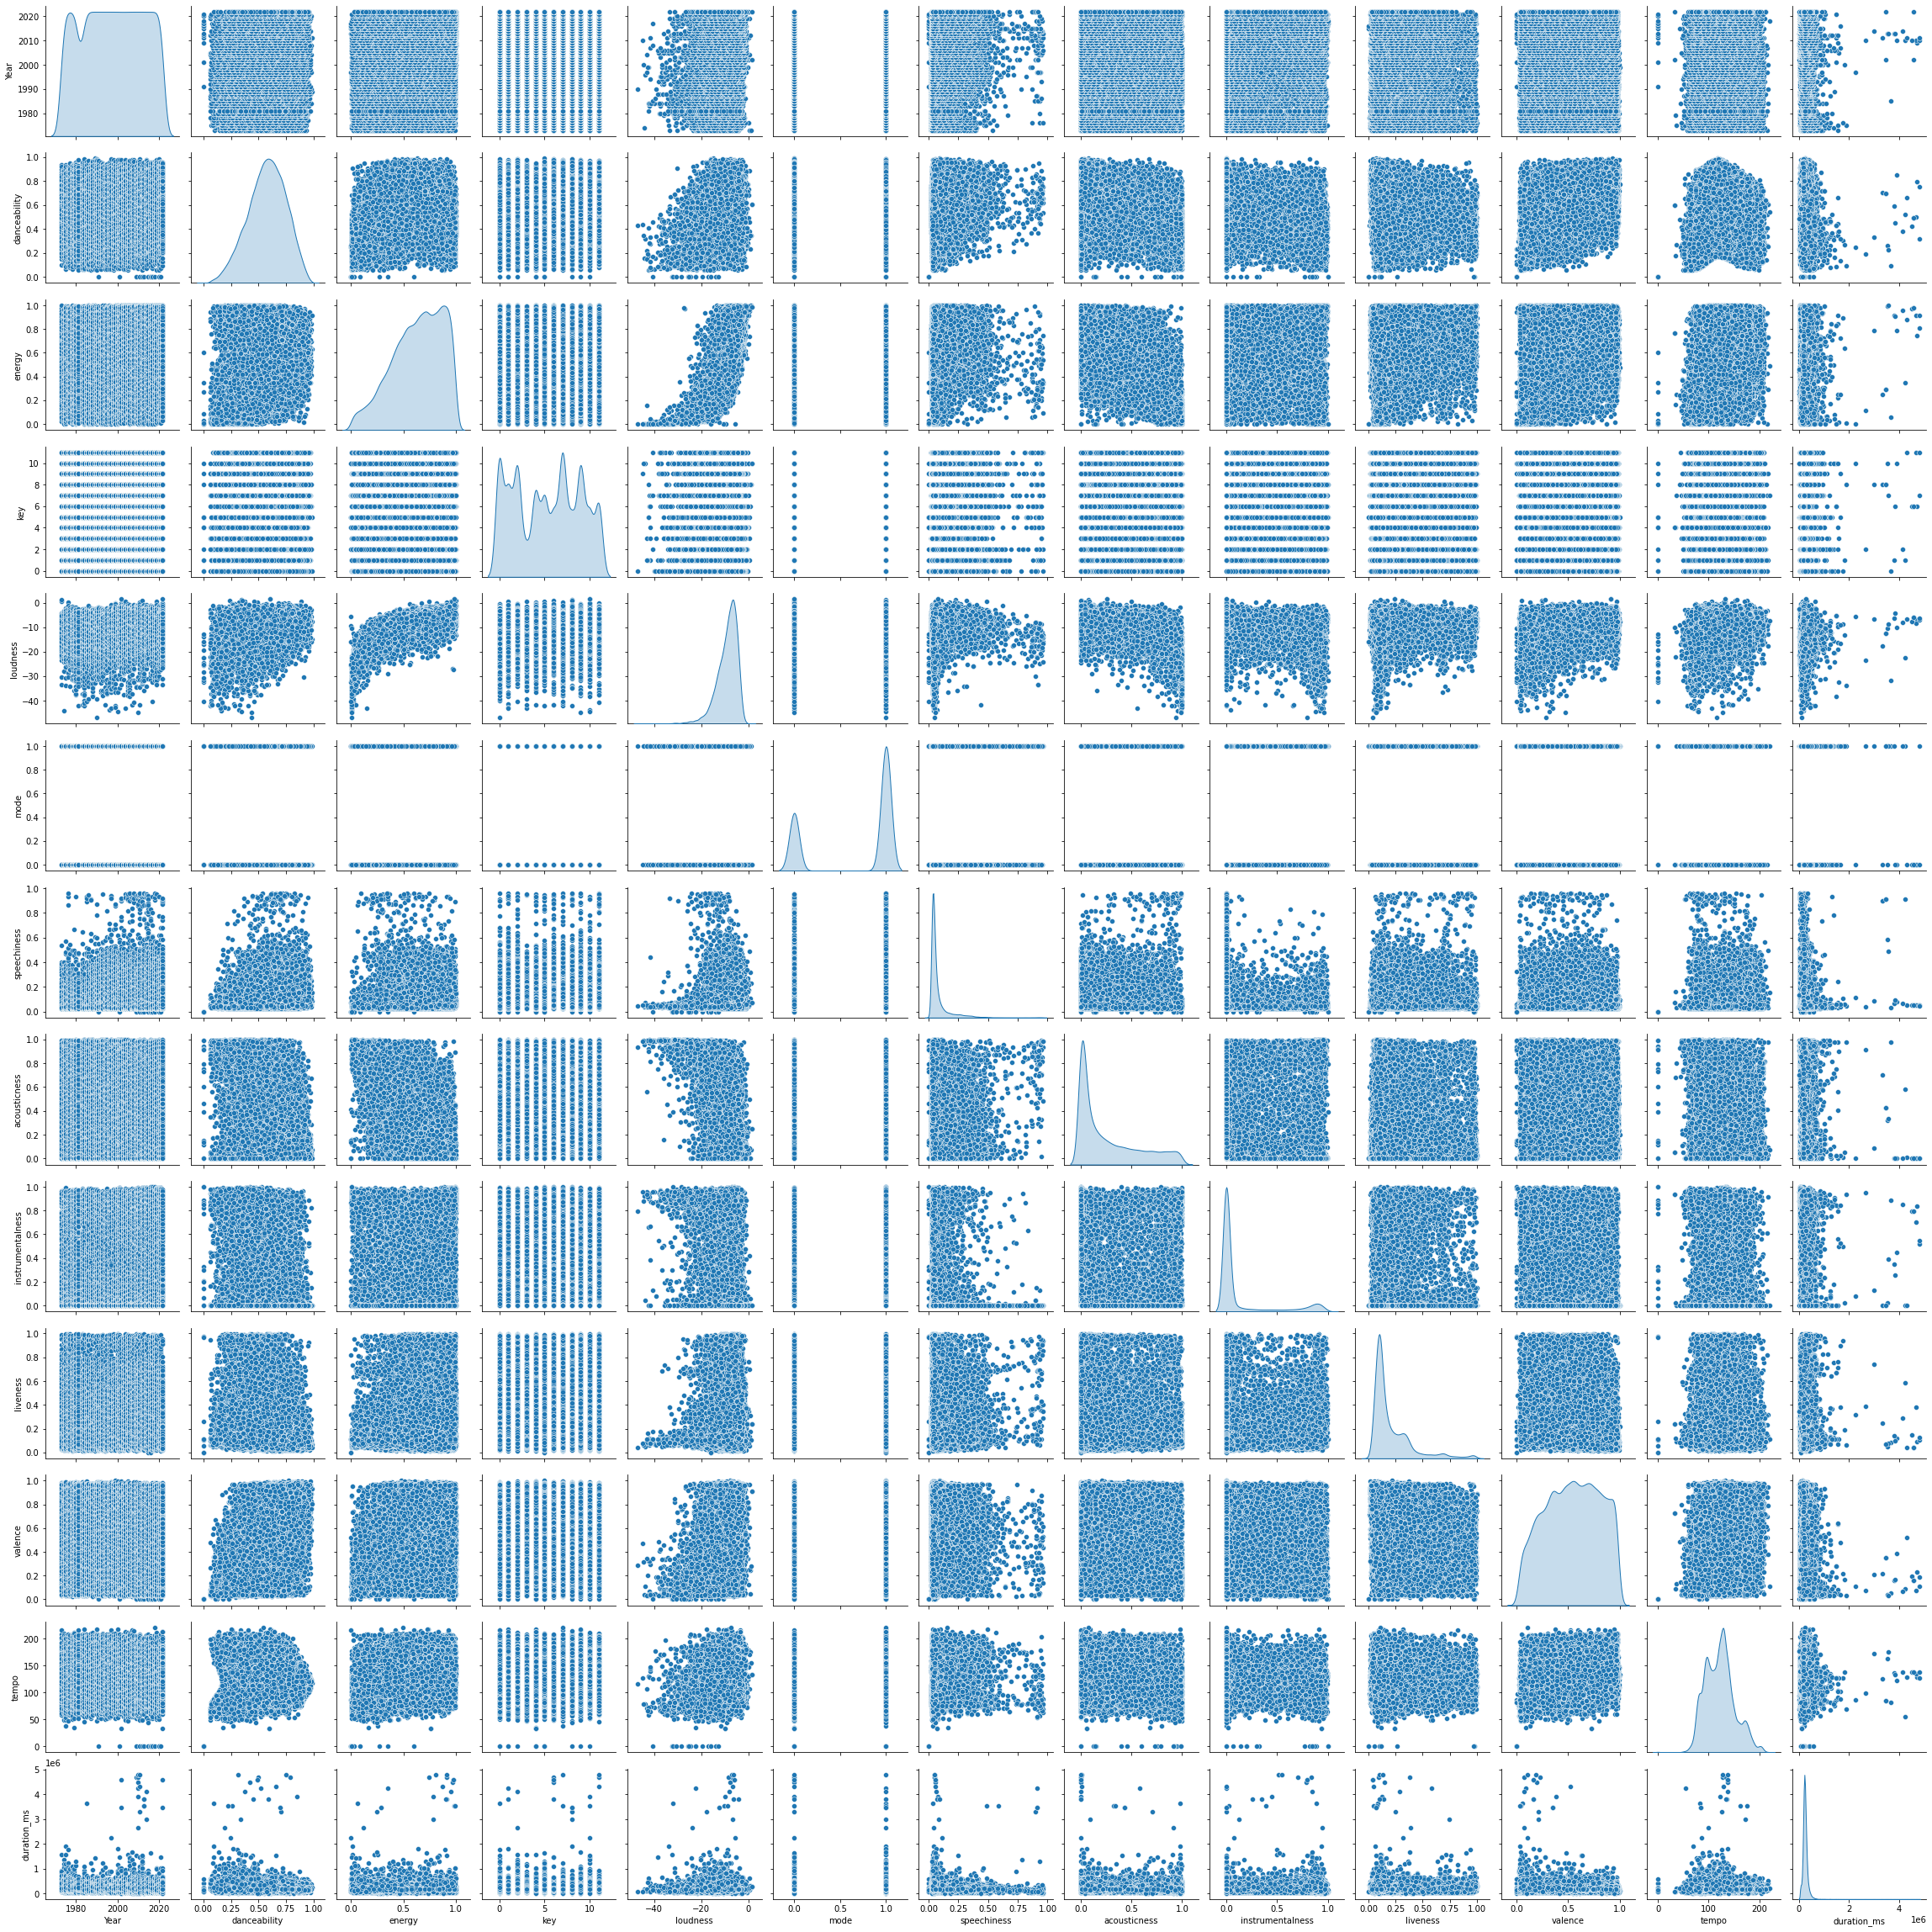

In [7]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde')